# Part 2: Concrete Strength Prediction

### Abstract:
Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.

### Description:
Features Name	Data Type	Measurement	Description
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable Water (component 4) | quantitative | kg in a m3 mixture | Input Variable Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable Age | quantitative | Day (1~365) | Input Variable Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
>Load Data

>Check Missing Values ( If Exist ; Fill each record with mean of its feature )

>Standardized the Input Variables. Hint: Centeralized the data

>Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

>Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

>Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
Train the Model with Epochs (100) and validate it

>If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

>Evaluation Step

>Prediction

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [11]:
#Load Data
c_data=pd.read_csv('compresive_strength_concrete.csv')
c_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
c_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [13]:
X=c_data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y=c_data['Concrete compressive strength(MPa, megapascals) ']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

In [15]:
model1= keras.Sequential()

In [16]:
model1.add(Dense(10,activation='relu', input_shape=(8,)))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

In [17]:
XX_c=model1.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
17/17 [==============================] - 0s 11ms/step - loss: 823.3295 - mae: 21.3600 - val_loss: 269.2515 - val_mae: 13.4473
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 208.7747 - mae: 11.4109 - val_loss: 145.1455 - val_mae: 9.7200
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 129.1176 - mae: 9.0852 - val_loss: 140.9355 - val_mae: 9.5564
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 113.4053 - mae: 8.4938 - val_loss: 137.7567 - val_mae: 9.3872
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 109.2923 - mae: 8.1916 - val_loss: 129.0494 - val_mae: 9.0222
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 107.7914 - mae: 8.2561 - val_loss: 132.7588 - val_mae: 9.2042
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 118.1128 - mae: 8.6516 - val_loss: 126.4115 - val_mae: 8.9839
Epoch 8/500
17/17 [==============================] 

Epoch 60/500
17/17 [==============================] - 0s 2ms/step - loss: 52.9889 - mae: 5.8293 - val_loss: 69.4762 - val_mae: 6.8530
Epoch 61/500
17/17 [==============================] - 0s 2ms/step - loss: 53.8759 - mae: 5.7017 - val_loss: 58.0932 - val_mae: 5.7705
Epoch 62/500
17/17 [==============================] - 0s 2ms/step - loss: 56.2748 - mae: 5.8836 - val_loss: 62.2702 - val_mae: 6.2873
Epoch 63/500
17/17 [==============================] - 0s 2ms/step - loss: 60.1540 - mae: 6.1181 - val_loss: 55.7769 - val_mae: 5.8061
Epoch 64/500
17/17 [==============================] - 0s 2ms/step - loss: 54.6035 - mae: 5.6773 - val_loss: 51.5941 - val_mae: 5.5575
Epoch 65/500
17/17 [==============================] - 0s 2ms/step - loss: 50.0929 - mae: 5.5617 - val_loss: 58.5595 - val_mae: 6.1175
Epoch 66/500
17/17 [==============================] - 0s 2ms/step - loss: 47.7073 - mae: 5.3435 - val_loss: 57.0634 - val_mae: 5.8528
Epoch 67/500
17/17 [==============================] - 0s 2ms/s

Epoch 121/500
17/17 [==============================] - 0s 2ms/step - loss: 42.7333 - mae: 4.9748 - val_loss: 52.6264 - val_mae: 5.4521
Epoch 122/500
17/17 [==============================] - 0s 2ms/step - loss: 44.5356 - mae: 5.1036 - val_loss: 51.3890 - val_mae: 5.4365
Epoch 123/500
17/17 [==============================] - 0s 2ms/step - loss: 44.1042 - mae: 5.1013 - val_loss: 53.0026 - val_mae: 5.4810
Epoch 124/500
17/17 [==============================] - 0s 2ms/step - loss: 43.0060 - mae: 5.0506 - val_loss: 64.0296 - val_mae: 6.2519
Epoch 125/500
17/17 [==============================] - 0s 2ms/step - loss: 46.9582 - mae: 5.2539 - val_loss: 56.6001 - val_mae: 5.7767
Epoch 126/500
17/17 [==============================] - 0s 2ms/step - loss: 41.9534 - mae: 4.9184 - val_loss: 52.4789 - val_mae: 5.5960
Epoch 127/500
17/17 [==============================] - 0s 2ms/step - loss: 45.8930 - mae: 5.1676 - val_loss: 55.3364 - val_mae: 5.7699
Epoch 128/500
17/17 [==============================] - 

Epoch 181/500
17/17 [==============================] - 0s 2ms/step - loss: 45.1279 - mae: 5.2013 - val_loss: 50.8738 - val_mae: 5.3480
Epoch 182/500
17/17 [==============================] - 0s 2ms/step - loss: 43.0224 - mae: 5.0645 - val_loss: 52.9534 - val_mae: 5.4241
Epoch 183/500
17/17 [==============================] - 0s 2ms/step - loss: 51.2093 - mae: 5.5544 - val_loss: 63.2852 - val_mae: 6.2644
Epoch 184/500
17/17 [==============================] - 0s 2ms/step - loss: 42.9839 - mae: 5.0913 - val_loss: 57.2072 - val_mae: 5.8406
Epoch 185/500
17/17 [==============================] - 0s 2ms/step - loss: 46.4012 - mae: 5.2914 - val_loss: 51.1753 - val_mae: 5.3120
Epoch 186/500
17/17 [==============================] - 0s 2ms/step - loss: 43.8618 - mae: 5.0751 - val_loss: 52.2788 - val_mae: 5.2950
Epoch 187/500
17/17 [==============================] - 0s 2ms/step - loss: 41.0164 - mae: 4.8690 - val_loss: 54.3585 - val_mae: 5.7696
Epoch 188/500
17/17 [==============================] - 

Epoch 242/500
17/17 [==============================] - 0s 2ms/step - loss: 41.7012 - mae: 4.9569 - val_loss: 50.2278 - val_mae: 5.2822
Epoch 243/500
17/17 [==============================] - 0s 2ms/step - loss: 36.9157 - mae: 4.6483 - val_loss: 58.9617 - val_mae: 5.8378
Epoch 244/500
17/17 [==============================] - 0s 2ms/step - loss: 47.5429 - mae: 5.3002 - val_loss: 49.0620 - val_mae: 5.4064
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 43.4077 - mae: 5.1182 - val_loss: 59.6131 - val_mae: 5.9694
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 38.6751 - mae: 4.8325 - val_loss: 54.4503 - val_mae: 5.6426
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 40.4738 - mae: 4.9026 - val_loss: 55.4004 - val_mae: 5.6400
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 39.2534 - mae: 4.8521 - val_loss: 51.2285 - val_mae: 5.6367
Epoch 249/500
17/17 [==============================] - 

17/17 [==============================] - 0s 2ms/step - loss: 43.8992 - mae: 5.0755 - val_loss: 52.3955 - val_mae: 5.6178
Epoch 303/500
17/17 [==============================] - 0s 2ms/step - loss: 37.7363 - mae: 4.7397 - val_loss: 56.7172 - val_mae: 6.0375
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 41.3147 - mae: 5.0404 - val_loss: 69.7390 - val_mae: 6.8887
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 44.5275 - mae: 5.1900 - val_loss: 49.8950 - val_mae: 5.3234
Epoch 306/500
17/17 [==============================] - 0s 2ms/step - loss: 39.4635 - mae: 4.7395 - val_loss: 47.7214 - val_mae: 5.2319
Epoch 307/500
17/17 [==============================] - 0s 2ms/step - loss: 36.7963 - mae: 4.6235 - val_loss: 47.0445 - val_mae: 5.2671
Epoch 308/500
17/17 [==============================] - 0s 2ms/step - loss: 38.5393 - mae: 4.8034 - val_loss: 49.7621 - val_mae: 5.3088
Epoch 309/500
17/17 [==============================] - 0s 2ms/step - 

Epoch 363/500
17/17 [==============================] - 0s 2ms/step - loss: 36.8870 - mae: 4.5827 - val_loss: 47.2928 - val_mae: 5.2072
Epoch 364/500
17/17 [==============================] - 0s 2ms/step - loss: 36.1598 - mae: 4.5789 - val_loss: 45.7703 - val_mae: 5.1556
Epoch 365/500
17/17 [==============================] - 0s 2ms/step - loss: 34.7849 - mae: 4.5161 - val_loss: 47.5131 - val_mae: 5.3045
Epoch 366/500
17/17 [==============================] - 0s 2ms/step - loss: 35.5887 - mae: 4.6476 - val_loss: 55.6961 - val_mae: 5.8163
Epoch 367/500
17/17 [==============================] - 0s 2ms/step - loss: 39.1839 - mae: 4.8204 - val_loss: 54.7492 - val_mae: 5.9379
Epoch 368/500
17/17 [==============================] - 0s 2ms/step - loss: 36.5340 - mae: 4.6661 - val_loss: 45.3581 - val_mae: 5.1924
Epoch 369/500
17/17 [==============================] - 0s 2ms/step - loss: 35.5445 - mae: 4.6297 - val_loss: 46.3471 - val_mae: 5.1989
Epoch 370/500
17/17 [==============================] - 

Epoch 423/500
17/17 [==============================] - 0s 2ms/step - loss: 34.5671 - mae: 4.5637 - val_loss: 49.7456 - val_mae: 5.2874
Epoch 424/500
17/17 [==============================] - ETA: 0s - loss: 27.1083 - mae: 4.00 - 0s 2ms/step - loss: 37.6435 - mae: 4.6615 - val_loss: 44.0627 - val_mae: 5.0661
Epoch 425/500
17/17 [==============================] - ETA: 0s - loss: 22.6013 - mae: 3.79 - 0s 2ms/step - loss: 33.3822 - mae: 4.4282 - val_loss: 54.0158 - val_mae: 5.8587
Epoch 426/500
17/17 [==============================] - ETA: 0s - loss: 59.4741 - mae: 5.89 - 0s 2ms/step - loss: 40.2038 - mae: 4.9179 - val_loss: 51.9525 - val_mae: 5.4188
Epoch 427/500
17/17 [==============================] - 0s 2ms/step - loss: 40.1071 - mae: 4.7910 - val_loss: 46.9667 - val_mae: 5.2847
Epoch 428/500
17/17 [==============================] - 0s 2ms/step - loss: 41.8472 - mae: 5.0530 - val_loss: 48.1810 - val_mae: 5.2581
Epoch 429/500
17/17 [==============================] - 0s 2ms/step - loss: 3

Epoch 482/500
17/17 [==============================] - 0s 2ms/step - loss: 34.2211 - mae: 4.4680 - val_loss: 47.2239 - val_mae: 5.1638
Epoch 483/500
17/17 [==============================] - 0s 2ms/step - loss: 36.7113 - mae: 4.6110 - val_loss: 47.1728 - val_mae: 5.3033
Epoch 484/500
17/17 [==============================] - 0s 2ms/step - loss: 33.8352 - mae: 4.4347 - val_loss: 45.8376 - val_mae: 5.1925
Epoch 485/500
17/17 [==============================] - 0s 2ms/step - loss: 36.3714 - mae: 4.6061 - val_loss: 47.2701 - val_mae: 5.2840
Epoch 486/500
17/17 [==============================] - 0s 2ms/step - loss: 40.3952 - mae: 4.9356 - val_loss: 57.1772 - val_mae: 5.7782
Epoch 487/500
17/17 [==============================] - 0s 2ms/step - loss: 39.2647 - mae: 4.8556 - val_loss: 51.7097 - val_mae: 5.4743
Epoch 488/500
17/17 [==============================] - 0s 2ms/step - loss: 39.3027 - mae: 4.7796 - val_loss: 53.9070 - val_mae: 5.6030
Epoch 489/500
17/17 [==============================] - 

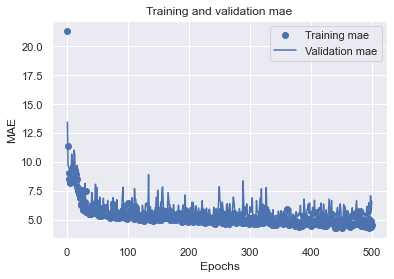

In [18]:
import matplotlib.pyplot as plt
loss = XX_c.history['mae']
val_loss = XX_c.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [19]:
y_hat_test = model1.predict(X_test)

In [20]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])

In [21]:
y_test = y_test.reset_index(drop=True)

In [22]:
df_pf['Target'] = y_test

In [23]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [24]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [25]:
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
8,37.387920,37.40,0.012080,0.032298
125,43.482059,43.50,0.017941,0.041243
39,52.015587,51.96,-0.055587,0.106980
289,45.632774,45.70,0.067226,0.147102
244,66.271706,66.70,0.428294,0.642120
...,...,...,...,...
215,11.491937,4.57,-6.921937,151.464698
23,18.795530,6.90,-11.895530,172.398990
239,20.095524,7.32,-12.775524,174.529014
210,20.512493,7.40,-13.112493,177.195853


In [26]:
df_pf['Difference%'].mean()

26.115505161943442

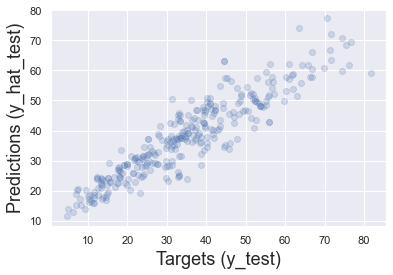

In [27]:
plt.scatter(df_pf['Target'], df_pf["Prediction"],alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()